<img src="images/intro.jpeg">

<center><h1><b>Project - Tree</b></h1></center>

<div style="background-color: #047800; border-radius: 5px;"> 
    <center><h1 style="color: white; padding: 20px;">1. Imports</h1></center>
</div>

In [15]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
from datetime import datetime
import seaborn as sn
from matplotlib import pyplot as plt

<div style="background-color: #047800; border-radius: 5px;"> 
    <center><h1 style="color: white; padding: 20px;">2. Read files </h1></center>
</div>

<div style="border: solid 4px #047800; border-radius: 5px;"> 
    <center><h3 style="color: #047800; padding: 10px;">2.1 Leitura da bases de dados dos formandos</h3></center>
</div>

In [16]:
form = pd.read_csv("databases/formandos_limpo.csv")

C:\Users\sarro\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [17]:
# delete column produced by the csv
del form['Unnamed: 0']

In [18]:
form.shape

(69378, 13)

In [19]:
form.head()

,UTE_ID,CodCEFP,Descritivo CodMedidaOrcam,Sexo,IdadeEmAnos,CodHabilitacao,CodNacionalidade,HorasForm,AreaFormacao,NivelFormacaoAccao,CodSaidaProfissional,Sucessos,DuracaoFormacao
0,24054,201,Cursos de Especialização Tecnológica,1,41,12,PT,1504.0,521,5,52174,0,375 days 00:00:00.000000000
1,39165,309,Cursos de Especialização Tecnológica,0,45,12,PT,1300.0,481,5,4816,0,325 days 00:00:00.000000000
2,77485,402,Cursos de Especialização Tecnológica,0,51,12,PT,211.0,481,5,4817,0,434 days 00:00:00.000000000
3,145884,501,Cursos de Especialização Tecnológica,0,53,12,PT,465.0,812,5,8126,0,382 days 00:00:00.000000000
4,155241,501,Cursos de Especialização Tecnológica,1,51,12,PT,447.0,812,5,8126,1,382 days 00:00:00.000000000


<div style="border: solid 4px #047800; border-radius: 5px;"> 
    <center><h3 style="color: #047800; padding: 10px;">2.2 Leitura da bases de dados dos cursos</h3></center>
</div>

In [20]:
cursos = pd.read_csv("databases/cursos.csv")

In [21]:
# delete column produced by the csv
del cursos['Unnamed: 0']

In [22]:
cursos.shape

(162138, 8)

In [23]:
cursos.head()

,UTE_ID,F_CCURSO,F_DCURSO,F_HORAS,TIPO_UTENTE,F_CAREA_FORM,CATEGORIA,DCATEGORIA
0,5963829,FM089AC,COMUNICAÇÃO ASSERTIVA E TÉCNICAS DE PROCURA DE...,25.0,A,999.0,5,OCUPADO
1,4320275,811141A,TÉCNICO/A DE RESTAURANTE/BAR,3525.0,A,811.0,5,OCUPADO
2,5124212,81114ZZ,TÉCNICO/A DE RESTAURANTE/BAR (UFCD),1050.0,A,811.0,5,OCUPADO
3,4787421,81205ZZ,TURISMO AMBIENTAL E RURAL,1425.0,A,812.0,5,OCUPADO
4,5522037,FM089AC,COMUNICAÇÃO ASSERTIVA E TÉCNICAS DE PROCURA DE...,25.0,A,999.0,5,OCUPADO


<div style="border: solid 4px #047800; border-radius: 5px;"> 
    <center><h3 style="color: #047800; padding: 10px;">2.3 Leitura da bases de dados dos centros de emprego</h3></center>
</div>

In [24]:
# ler ficheiro com informação dos centros de emprego por zona
centros = pd.read_excel("databases/AgrupamentoCentrosRegiao.xlsx")
centros.head(5)

,CodCEFP,Zona
0,302,Lisboa e Vale do Tejo
1,148,Norte
2,150,Norte
3,136,Norte
4,303,Lisboa e Vale do Tejo


In [25]:
centros.shape

(54, 2)

<div style="background-color: #047800; border-radius: 5px;">
    <center><h1 style="color: white; padding: 20px;">3. Junção das bases de dados</h1></center>
</div>

In [26]:
merged = form.merge(cursos, on="UTE_ID", how="inner")

In [27]:
merged.shape

(109595, 20)

In [28]:
merged.head(3)

,UTE_ID,CodCEFP,Descritivo CodMedidaOrcam,Sexo,IdadeEmAnos,CodHabilitacao,CodNacionalidade,HorasForm,AreaFormacao,NivelFormacaoAccao,CodSaidaProfissional,Sucessos,DuracaoFormacao,F_CCURSO,F_DCURSO,F_HORAS,TIPO_UTENTE,F_CAREA_FORM,CATEGORIA,DCATEGORIA
0,24054,201,Cursos de Especialização Tecnológica,1,41,12,PT,1504.0,521,5,52174,0,375 days 00:00:00.000000000,62110ZZ,OPERADOR/A AGRÍCOLA (UFCD),825.0,A,621.0,5,OCUPADO
1,24054,201,Cursos de Especialização Tecnológica,1,41,12,PT,1504.0,521,5,52174,0,375 days 00:00:00.000000000,521641E,TÉCNICO/A ESPECIALISTA EM TECNOLOGIA MECATRÓNICA,1560.0,A,521.0,5,OCUPADO
2,39165,309,Cursos de Especialização Tecnológica,0,45,12,PT,1300.0,481,5,4816,0,325 days 00:00:00.000000000,48102ZZ,TÉCNICO/A DE INFORMÁTICA - SISTEMAS,1025.0,A,481.0,5,OCUPADO


In [29]:
merged = merged.merge(centros, on="CodCEFP", how="left")
merged.head(5)

,UTE_ID,CodCEFP,Descritivo CodMedidaOrcam,Sexo,IdadeEmAnos,CodHabilitacao,CodNacionalidade,HorasForm,AreaFormacao,NivelFormacaoAccao,...,Sucessos,DuracaoFormacao,F_CCURSO,F_DCURSO,F_HORAS,TIPO_UTENTE,F_CAREA_FORM,CATEGORIA,DCATEGORIA,Zona
0,24054,201,Cursos de Especialização Tecnológica,1,41,12,PT,1504.0,521,5,...,0,375 days 00:00:00.000000000,62110ZZ,OPERADOR/A AGRÍCOLA (UFCD),825.0,A,621.0,5,OCUPADO,Centro
1,24054,201,Cursos de Especialização Tecnológica,1,41,12,PT,1504.0,521,5,...,0,375 days 00:00:00.000000000,521641E,TÉCNICO/A ESPECIALISTA EM TECNOLOGIA MECATRÓNICA,1560.0,A,521.0,5,OCUPADO,Centro
2,39165,309,Cursos de Especialização Tecnológica,0,45,12,PT,1300.0,481,5,...,0,325 days 00:00:00.000000000,48102ZZ,TÉCNICO/A DE INFORMÁTICA - SISTEMAS,1025.0,A,481.0,5,OCUPADO,Lisboa e Vale do Tejo
3,39165,309,Cursos de Especialização Tecnológica,0,45,12,PT,1300.0,481,5,...,0,325 days 00:00:00.000000000,481061E,GESTÃO DE REDES E SISTEMAS INFORMÁTICOS,1375.0,A,481.0,5,OCUPADO,Lisboa e Vale do Tejo
4,77485,402,Cursos de Especialização Tecnológica,0,51,12,PT,211.0,481,5,...,0,434 days 00:00:00.000000000,48102ZZ,TÉCNICO/A DE INFORMÁTICA - SISTEMAS,1025.0,A,481.0,5,OCUPADO,Alentejo


In [30]:
# NEEDED FOR THE DJANGO INTERFACE TO WORK
merged_interface = merged[["UTE_ID", "CodCEFP", "IdadeEmAnos", "CodHabilitacao", 
                           "AreaFormacao", "HorasForm", "F_DCURSO"]]

merged_interface.to_csv("databases/interface_django_tree.csv")

In [31]:
merged_interface.dtypes

UTE_ID              int64
CodCEFP             int64
IdadeEmAnos         int64
CodHabilitacao      int64
AreaFormacao        int64
HorasForm         float64
F_DCURSO           object
dtype: object

<div style="background-color: #047800; border-radius: 5px;">
    <center><h1 style="color: white; padding: 20px;">4. Taxa de sucesso por curso</h1></center>
</div>

In [60]:
# criar tabela com contagem de cada formação
count_form = merged[['F_DCURSO', "UTE_ID"]] \
            .groupby("F_DCURSO") \
            .count() \
            .rename(columns = {'UTE_ID': 'Count'})

count_form

,Count
F_DCURSO,
ARRANJOS FLORAIS E DECORAÇÃO,20
INTRODUÇÃO AOS CUIDADOS DE BELEZA,21
LOGÍSTICA - CADEIA DE ABASTECIMENTO (B3) Q+,11
LÍNGUA ESPANHOLA - ATENDIMENTO E VENDAS,59
LÍNGUA ESPANHOLA - INFORMAÇÃO E ATENDIMENTO TÉCNICO,2
...,...
WEB E MULTIMÉDIA,28
WINDOWS SERVER - REDE E SERVIÇOS,4
WORLDSKILLS KAZAN 2019 - FORMAÇÃO ESPECÍFICA EM SOLDADURA,1


In [33]:
# filtrar apenas os casos de sucesso
succ = merged[merged["Sucessos"]==1]


# criar tabela com contagem de cada formação com outcome <sucesso>
count_form_succ = succ[['F_DCURSO', "UTE_ID"]] \
            .groupby("F_DCURSO") \
            .count() \
            .rename(columns = {'UTE_ID': 'Count_succ'})

count_form_succ

,Count_succ
F_DCURSO,
ARRANJOS FLORAIS E DECORAÇÃO,2
INTRODUÇÃO AOS CUIDADOS DE BELEZA,5
LOGÍSTICA - CADEIA DE ABASTECIMENTO (B3) Q+,1
LÍNGUA ESPANHOLA - ATENDIMENTO E VENDAS,9
TÉCNICO/A DE BANCA E SEGUROS,2
...,...
VIDREIRO/A,43
WEB E MULTIMÉDIA,2
WINDOWS SERVER - REDE E SERVIÇOS,1


In [34]:
# merge both dataframe based on F_CCURSO
merge_count = count_form.merge(count_form_succ, on="F_DCURSO", how="left")

# change NAN to zeros
merge_count["Count_succ"] = merge_count["Count_succ"].fillna(0)
merge_count

,Count,Count_succ
F_DCURSO,,
ARRANJOS FLORAIS E DECORAÇÃO,20,2.0
INTRODUÇÃO AOS CUIDADOS DE BELEZA,21,5.0
LOGÍSTICA - CADEIA DE ABASTECIMENTO (B3) Q+,11,1.0
LÍNGUA ESPANHOLA - ATENDIMENTO E VENDAS,59,9.0
LÍNGUA ESPANHOLA - INFORMAÇÃO E ATENDIMENTO TÉCNICO,2,0.0
...,...,...
WEB E MULTIMÉDIA,28,2.0
WINDOWS SERVER - REDE E SERVIÇOS,4,1.0
WORLDSKILLS KAZAN 2019 - FORMAÇÃO ESPECÍFICA EM SOLDADURA,1,1.0


In [35]:
# criar uma variável para guardar a taxa de sucesso de cada curso após a sua conclusão
merge_count["succ_rate"] = merge_count["Count_succ"] / merge_count["Count"]
merge_count

,Count,Count_succ,succ_rate
F_DCURSO,,,
ARRANJOS FLORAIS E DECORAÇÃO,20,2.0,0.100000
INTRODUÇÃO AOS CUIDADOS DE BELEZA,21,5.0,0.238095
LOGÍSTICA - CADEIA DE ABASTECIMENTO (B3) Q+,11,1.0,0.090909
LÍNGUA ESPANHOLA - ATENDIMENTO E VENDAS,59,9.0,0.152542
LÍNGUA ESPANHOLA - INFORMAÇÃO E ATENDIMENTO TÉCNICO,2,0.0,0.000000
...,...,...,...
WEB E MULTIMÉDIA,28,2.0,0.071429
WINDOWS SERVER - REDE E SERVIÇOS,4,1.0,0.250000
WORLDSKILLS KAZAN 2019 - FORMAÇÃO ESPECÍFICA EM SOLDADURA,1,1.0,1.000000


In [36]:
merge_count.to_csv("databases/succ_rate.csv")

<div style="background-color: #047800; border-radius: 5px;">
    <center><h1 style="color: white; padding: 20px;">5. Recommender System (Tree)</h1></center>
</div>

<div style="border: solid 4px #047800; border-radius: 5px;"> 
    <center><h3 style="color: #047800; padding: 10px;">5.1 Input</h3></center>
</div>

In [37]:
# input utilizador

# descrição do utente
idade = 45
hab = 9

# descrição do curso pretendido
horas = 1000
centro = 309
area = 481

In [38]:
merged.shape

(109595, 21)

In [39]:
semelhantes = merged

<div style="border: solid 4px #047800; border-radius: 5px;"> 
    <center><h3 style="color: #047800; padding: 10px;">5.2 Filtro da variável Idade</h3></center>
</div>

In [40]:
# criação de duas variáveis relativas à idade minima e máxima na qual vamos basear o filtro 
scale = semelhantes["IdadeEmAnos"].max() - semelhantes["IdadeEmAnos"].min()

proportion = 0.15

min_age = idade - scale * 0.15
max_age = idade + scale * 0.15

# aplicar filtros relativos à idade do utente
semelhantes = semelhantes[(semelhantes["IdadeEmAnos"] > min_age) & (semelhantes["IdadeEmAnos"] < max_age)]

In [41]:
##################Comentário####################

# Este criterio não faz sentido se fizermos o clustering pq ao fazer a proporção de 0.15 estamos a considerar
# todo o universo e com o clustering podiamos refinar isto:
# de duas uma ou colocamos a idade do cluster correspondente 
# ou fazemos uma seleção com um desvio baseado na idade do input e o valor do cluster
# 

In [42]:
semelhantes.shape

(44412, 21)

<div style="border: solid 4px #047800; border-radius: 5px;"> 
    <center><h3 style="color: #047800; padding: 10px;">5.3 Filtro da variável Horas da Formação</h3></center>
</div>

In [43]:
# criação de duas variáveis relativas ao tempo minimo e máximo em horas da formação.
scale = semelhantes["HorasForm"].max() - semelhantes["HorasForm"].min()

proportion = 0.10

min_hours = idade - scale * 0.15
max_hours = idade + scale * 0.15

# aplicar filtros relativos à idade do utente
semelhantes = semelhantes[(semelhantes["HorasForm"] > min_hours) & (semelhantes["HorasForm"] < max_hours)]

In [44]:
##################Comentário####################
# na arvore que vai ser aplicada ao cluster e ao resultado do novo user ele vai estar dentro de um range de horas
# de formaçao logo evitamos a dificuldade de estar a varrer um range com um criterio de 0.15

In [45]:
semelhantes.shape

(38143, 21)

<div style="border: solid 4px #047800; border-radius: 5px;"> 
    <center><h3 style="color: #047800; padding: 10px;">5.4 Filtro da variável Centro de Formação (Zona)</h3></center>
</div>

In [46]:
# receber Centro e devolver Zona do País
zona = centros[centros["CodCEFP"] == centro]["Zona"]
zona_index = zona.index[0]
zona = zona[zona_index]
zona

'Lisboa e Vale do Tejo'

In [47]:
# aplicar filtros relativos ao centro de emprego do utente
semelhantes = semelhantes[semelhantes["Zona"]==zona]

In [48]:
##################Comentário####################
# os valores por cluster são por zonas/regiões o que permitia obter mais resulltados 

In [49]:
semelhantes.shape

(10561, 21)

<div style="border: solid 4px #047800; border-radius: 5px;"> 
    <center><h3 style="color: #047800; padding: 10px;">5.5 Filtro da variável Area de Formação</h3></center>
</div>

In [50]:
# aplicar filtros relativos à AreaFormacao do utente
semelhantes = semelhantes[semelhantes["AreaFormacao"]==area]

In [51]:
semelhantes.shape

(1186, 21)

<div style="background-color: #047800; border-radius: 5px;">
    <center><h1 style="color: white; padding: 20px;">6. Output</h1></center>
</div>

<div style="border: solid 4px #047800; border-radius: 5px;"> 
    <center><h3 style="color: #047800; padding: 10px;">6.1 Frequência absoluta</h3></center>
</div>

In [52]:
abs_freq = pd.DataFrame(semelhantes["F_DCURSO"].value_counts())
abs_freq.head(10)

,F_DCURSO
OPERADOR/A DE INFORMÁTICA,418
TÉCNICO/A DE INFORMÁTICA - SISTEMAS,115
ASSISTENTE ADMINISTRATIVO/A,52
INFORMÁTICA,29
TÉCNICAS DE APOIO À GESTÃO (UFCD),29
TÉCNICO/A DE INFORMÁTICA - INSTALAÇÃO E GESTÃO DE REDES,28
INFORMÁTICA - PROCESSADOR DE TEXTO E FOLHA DE CÁLCULO,22
PRÁTICAS ADMINISTRATIVAS,21
COMPETÊNCIAS EMPREENDEDORAS E TÉCNICAS DE PROCURA DE EMPREGO - FORMAÇÃO TRANSVERSAL,19
FORMAÇÃO CONTÍNUA DE FORMADORES,17


In [53]:
# guardar indíce dos cursos do output
index = abs_freq.index
indexes = []

for i in index:
    indexes.append(i)

indexes[0:10]

['OPERADOR/A DE INFORMÁTICA',
 'TÉCNICO/A DE INFORMÁTICA - SISTEMAS',
 'ASSISTENTE ADMINISTRATIVO/A',
 'INFORMÁTICA',
 'TÉCNICAS DE APOIO À GESTÃO (UFCD)',
 'TÉCNICO/A DE INFORMÁTICA - INSTALAÇÃO E GESTÃO DE REDES',
 'INFORMÁTICA - PROCESSADOR DE TEXTO E FOLHA DE CÁLCULO',
 'PRÁTICAS ADMINISTRATIVAS',
 'COMPETÊNCIAS EMPREENDEDORAS E TÉCNICAS DE PROCURA DE EMPREGO - FORMAÇÃO TRANSVERSAL',
 'FORMAÇÃO CONTÍNUA DE FORMADORES']

<div style="border: solid 4px #047800; border-radius: 5px;"> 
    <center><h3 style="color: #047800; padding: 10px;">6.2 Adicionar taxa de sucesso</h3></center>
</div>

In [54]:
succ_rate = merge_count.loc[indexes]
succ_rate.head(5)

,Count,Count_succ,succ_rate
F_DCURSO,,,
OPERADOR/A DE INFORMÁTICA,3545,1024.0,0.288858
TÉCNICO/A DE INFORMÁTICA - SISTEMAS,1338,298.0,0.222720
ASSISTENTE ADMINISTRATIVO/A,2287,870.0,0.380411
INFORMÁTICA,101,22.0,0.217822
TÉCNICAS DE APOIO À GESTÃO (UFCD),1942,574.0,0.295572


In [55]:
output = pd.concat([abs_freq, succ_rate], axis=1)
output.head(5)

,F_DCURSO,Count,Count_succ,succ_rate
F_DCURSO,,,,
OPERADOR/A DE INFORMÁTICA,418,3545,1024.0,0.288858
TÉCNICO/A DE INFORMÁTICA - SISTEMAS,115,1338,298.0,0.222720
ASSISTENTE ADMINISTRATIVO/A,52,2287,870.0,0.380411
INFORMÁTICA,29,101,22.0,0.217822
TÉCNICAS DE APOIO À GESTÃO (UFCD),29,1942,574.0,0.295572


<div style="border: solid 4px #047800; border-radius: 5px;"> 
    <center><h3 style="color: #047800; padding: 10px;">6.3 Final score</h3></center>
</div>

In [56]:
# adicionar 0.05 à taxa de sucesso, deste modo, se esta for 0 o curso tem alguma probabilidade de recomendação
output["final_score"] = output["F_DCURSO"] * (output["succ_rate"] + 0.005)

# ordenar tabela pelo score final
output = output.sort_values("final_score", ascending=False)
output.head(5)

,F_DCURSO,Count,Count_succ,succ_rate,final_score
F_DCURSO,,,,,
OPERADOR/A DE INFORMÁTICA,418,3545,1024.0,0.288858,122.832454
TÉCNICO/A DE INFORMÁTICA - SISTEMAS,115,1338,298.0,0.222720,26.187855
ASSISTENTE ADMINISTRATIVO/A,52,2287,870.0,0.380411,20.041373
FORMAÇÃO CONTÍNUA DE FORMADORES,17,251,205.0,0.816733,13.969462
TÉCNICAS DE APOIO À GESTÃO (UFCD),29,1942,574.0,0.295572,8.716576


<div style="border: solid 4px #047800; border-radius: 5px;"> 
    <center><h3 style="color: #047800; padding: 10px;">6.4 Graph</h3></center>
</div>

In [57]:
final_scores = output["final_score"][0:10]
final_scores

F_DCURSO
OPERADOR/A DE INFORMÁTICA                                  122.832454
TÉCNICO/A DE INFORMÁTICA - SISTEMAS                         26.187855
ASSISTENTE ADMINISTRATIVO/A                                 20.041373
FORMAÇÃO CONTÍNUA DE FORMADORES                             13.969462
TÉCNICAS DE APOIO À GESTÃO (UFCD)                            8.716576
TÉCNICO/A DE INFORMÁTICA - INSTALAÇÃO E GESTÃO DE REDES      8.540000
INFORMÁTICA - PROCESSADOR DE TEXTO E FOLHA DE CÁLCULO        7.323115
ASSISTENTE FAMILIAR E DE APOIO À COMUNIDADE (UFCD)           7.024123
INFORMÁTICA                                                  6.461832
TÉCNICO/A DE SECRETARIADO                                    6.254339
Name: final_score, dtype: float64

In [58]:
final_indexes = output.index[0:10]
final_indexes

Index(['OPERADOR/A DE INFORMÁTICA', 'TÉCNICO/A DE INFORMÁTICA - SISTEMAS',
       'ASSISTENTE ADMINISTRATIVO/A', 'FORMAÇÃO CONTÍNUA DE FORMADORES',
       'TÉCNICAS DE APOIO À GESTÃO (UFCD)',
       'TÉCNICO/A DE INFORMÁTICA - INSTALAÇÃO E GESTÃO DE REDES',
       'INFORMÁTICA - PROCESSADOR DE TEXTO E FOLHA DE CÁLCULO',
       'ASSISTENTE FAMILIAR E DE APOIO À COMUNIDADE (UFCD)', 'INFORMÁTICA',
       'TÉCNICO/A DE SECRETARIADO'],
      dtype='object', name='F_DCURSO')

Text(0.5, 1.0, 'Top 10 - Formações recomendadas')

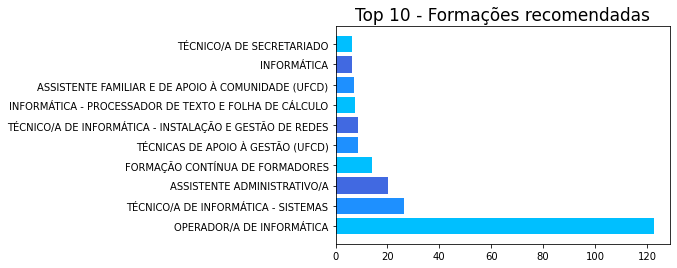

In [59]:
# Gráfico relativo ao sucesso e insucesso

plt.barh(final_indexes, final_scores, color=["#00BFFF", "#1E90FF", "#4169E1"])
plt.title("Top 10 - Formações recomendadas", size=17)